In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('bestsellers with categories.csv')

In [38]:
df.head(5)

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [39]:
print(df.shape)

(550, 7)


In [40]:
d = df.groupby('Name')
print('Про скільки книг зберігає дані датасет? Відповідь: ', len(d))

Про скільки книг зберігає дані датасет? Відповідь:  351


In [41]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

______________________________________________________________________________________________________________________________

In [42]:
result = sum(df.isna().sum())
if result > 0:
    res = 'Так'
else:
    res = 'Ні'
print('Чи є в якихось змінних пропуски? (Так / ні). Відповідь:', res)

Чи є в якихось змінних пропуски? (Так / ні). Відповідь: Ні


In [43]:
result = df['genre'].unique()
print(' Які є унікальні жанри? Відповідь: ', ', '.join(result))

 Які є унікальні жанри? Відповідь:  Non Fiction, Fiction


In [33]:
import matplotlib.pyplot as plt

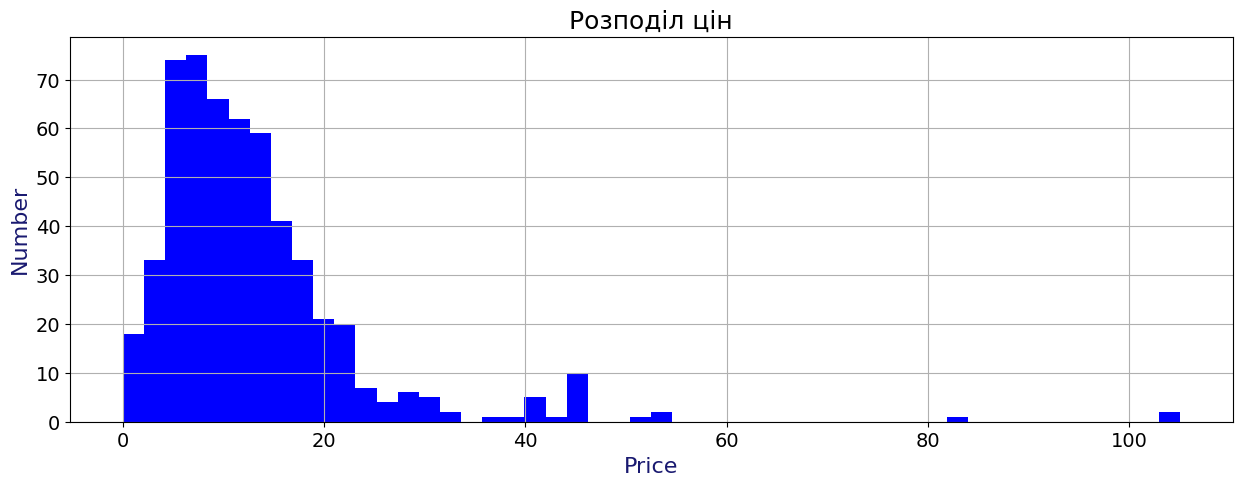

In [34]:
fig = plt.subplots(figsize=(15, 5))
df.price.plot(kind='hist', fontsize=14,
              grid=True, bins=50, color='blue')
plt.title("Розподіл цін", fontdict = {'fontsize' : 18})
plt.xlabel("Price", size=16, color="midnightblue")
plt.ylabel("Number", size=16, color="midnightblue")
plt.show()

In [46]:
max, min, mean, meedian = df['price'].agg(['max', 'min', 'mean', 'median'])

In [47]:
print('Максимальна ціна? Вдповідь: ', max)
print('Мінімальна ціна? Вдповідь: ', min)
print('Середня ціна? Вдповідь: ', mean)
print('Медіанна ціна? Вдповідь: ', median)

Максимальна ціна? Вдповідь:  105.0
Мінімальна ціна? Вдповідь:  0.0
Середня ціна? Вдповідь:  13.1
Медіанна ціна? Вдповідь:  median    11.0
Name: price, dtype: float64


______________________________________________________________________________________________________________________________

In [48]:
result = df['user_rating'].agg('max')
print('Який рейтинг у датасеті найвищий? Відповідь: ', result)

Який рейтинг у датасеті найвищий? Відповідь:  4.9


In [49]:
count = df[df['user_rating'].eq(result)].groupby('name').ngroups
print('Скільки книг мають такий рейтинг? Відповідь: ', count)

Скільки книг мають такий рейтинг? Відповідь:  28


In [50]:
book = df[df['reviews'].eq(df['reviews'].agg('max'))]
print(' Яка книга має найбільше відгуків? Відповідь: "', book.name.values[0], '"')

 Яка книга має найбільше відгуків? Відповідь: " Where the Crawdads Sing "


In [52]:
result = df.query('year==2015').sort_values('user_rating', ascending=False).head(50)
expensive = result[result['price'].eq(result['price'].agg('max'))]
print(' З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: ', expensive['name'].values[0])


 З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь:  Publication Manual of the American Psychological Association, 6th Edition


In [53]:
result = df.query('year==2010 & genre=="Fiction"').sort_values('user_rating', ascending=False).head(50)
print('Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: ', result.shape[0])

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь:  20


In [54]:
result = df.query('(year==2010 | year==2011) & user_rating==4.9')
print('Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь:', result.shape[0])

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1


In [55]:
result = df.query('year==2015 & price<8').sort_values('price')
result

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


In [57]:
print('Яка книга остання у відсортованому списку? Відповідь: ', result.tail(1).name.values[0])

Яка книга остання у відсортованому списку? Відповідь:  Old School (Diary of a Wimpy Kid #10)


______________________________________________________________________________________________________________________________

In [58]:
result = df.groupby('genre')['price'].agg(['min', 'max'])
result.head()

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


In [61]:
print('Максимальна ціна для жанру Fiction: Відповідь: ', result.query('genre=="Fiction"')['max'].values[0])
print('Мінімальна ціна для жанру Fiction: Відповідь: ', result.query('genre=="Fiction"')['min'].values[0])

Максимальна ціна для жанру Fiction: Відповідь:  82
Мінімальна ціна для жанру Fiction: Відповідь:  0


In [62]:
print('Максимальна ціна для жанру Non Fiction: Відповідь: ', result.query('genre=="Non Fiction"')['max'].values[0])
print('Мінімальна ціна для жанру Non Fiction: Відповідь: ', result.query('genre=="Non Fiction"')['min'].values[0])

Максимальна ціна для жанру Non Fiction: Відповідь:  105
Мінімальна ціна для жанру Non Fiction: Відповідь:  0


In [63]:
authors = df[['name', 'author']].groupby('author').agg(cnt=('name','count')).reset_index()

In [64]:
print('Якої розмірності вийшла таблиця? Відповідь: ', authors.shape)

Якої розмірності вийшла таблиця? Відповідь:  (248, 2)


In [65]:
max_books = authors.sort_values('cnt').tail(1)
print(' Який автор має найбільше книг? Відповідь: ', max_books.values[0][0])

 Який автор має найбільше книг? Відповідь:  Jeff Kinney


In [66]:
print('Скільки книг цього автора? Відповідь: ', max_books.values[0][1])

Скільки книг цього автора? Відповідь:  12


In [78]:
ratings = df[['author', 'user_rating']].groupby('author').agg(avg_rating=('user_rating', 'mean')).round(1).reset_index()

In [80]:
ratings

,author,avg_rating
0,Abraham Verghese,4.6
1,Adam Gasiewski,4.4
2,Adam Mansbach,4.8
3,Adir Levy,4.8
4,Admiral William H. McRaven,4.7
...,...,...
243,Walter Isaacson,4.6
244,William Davis,4.4
245,William P. Young,4.6
246,Wizards RPG Team,4.8


In [79]:
print('У якого автора середній рейтинг мінімальний? Відповідь: ', ratings.sort_values('avg_rating').head(1).values[0][0])

У якого автора середній рейтинг мінімальний? Відповідь:  Donna Tartt


In [81]:
print('Який у цього автора середній рейтинг? Відповідь: ', ratings.sort_values('avg_rating').head(1).values[0][1])

Який у цього автора середній рейтинг? Відповідь:  3.9


In [86]:
result = pd.concat([authors, ratings], axis=1)
result = result.rename(columns={"count": "book_count", "mean": "avg_rating"})
result.head()

,author,cnt,author,avg_rating
0,Abraham Verghese,2,Abraham Verghese,4.6
1,Adam Gasiewski,1,Adam Gasiewski,4.4
2,Adam Mansbach,1,Adam Mansbach,4.8
3,Adir Levy,1,Adir Levy,4.8
4,Admiral William H. McRaven,1,Admiral William H. McRaven,4.7


In [87]:
result = result.sort_values(['cnt', 'avg_rating'])
result.head()

,author,cnt,author,avg_rating
171,Muriel Barbery,1,Muriel Barbery,4.0
43,Chris Cleave,1,Chris Cleave,4.1
109,Ian K. Smith M.D.,1,Ian K. Smith M.D.,4.1
186,Pierre Dukan,1,Pierre Dukan,4.1
81,Elizabeth Strout,1,Elizabeth Strout,4.2


In [88]:
print('Який автор перший у списку? Відповідь: ', result.head(1).values[0][0])

Який автор перший у списку? Відповідь:  Muriel Barbery


In [99]:
result

,author,cnt,author,avg_rating
171,Muriel Barbery,1,Muriel Barbery,4.0
43,Chris Cleave,1,Chris Cleave,4.1
109,Ian K. Smith M.D.,1,Ian K. Smith M.D.,4.1
186,Pierre Dukan,1,Pierre Dukan,4.1
81,Elizabeth Strout,1,Elizabeth Strout,4.2
...,...,...,...,...
11,American Psychological Association,10,American Psychological Association,4.5
92,Gary Chapman,11,Gary Chapman,4.7
226,Suzanne Collins,11,Suzanne Collins,4.7
197,Rick Riordan,11,Rick Riordan,4.8


______________________________________________________________________________________________________________________________

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

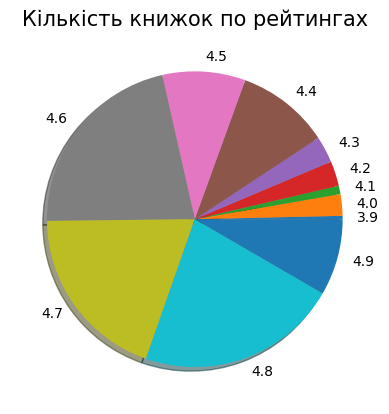

In [93]:
data = result.groupby('avg_rating')['cnt'].sum().reset_index()
plt.pie(data['cnt'].values, 
        labels=data['avg_rating'].values, 
        shadow=True, 
        labeldistance=1.1
       )
plt.title('Кількість книжок по рейтингах', fontsize=15, y=1)
plt.show()

ValueError: Could not interpret value `book_count` for parameter `x`

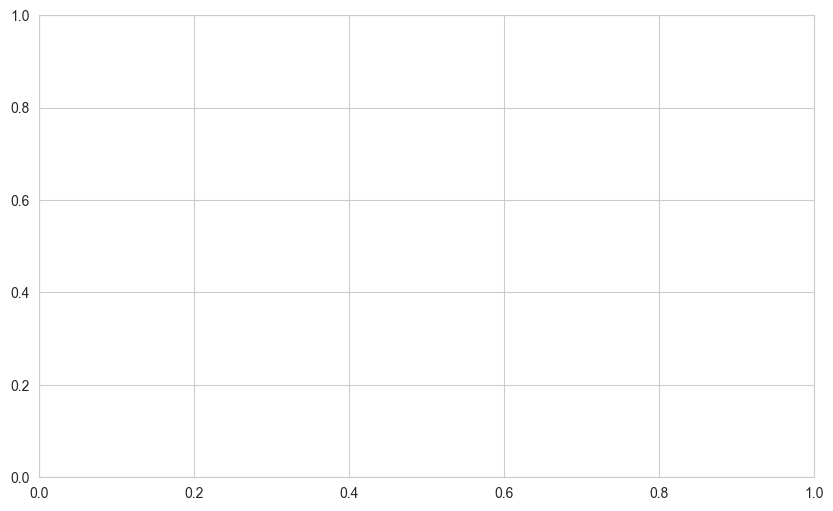

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_style("whitegrid")
sns.lineplot(x="book_count", y="avg_rating", data=result, sort=False)
plt.show()